## K Means Clustering

Online retail is a transactional data set which contains all the transactions occurring between 01/12/2010 and 9/12/2011 for a UK-Based and registration non-store online retail. The company mainly sells unique all occasions gifts. Many customers of the company are wholesalers 

## What do you want to achieve ? 

segment the customers based on RFM so that the company can target its customers efficiently.

### R(Recency):Numbers days since last purchase

### F (Frequency): Number of transactions 

### M (Monetary): Total amount of transactions (revenue contributed).

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [76]:
retail = pd.read_csv('OnlineRetail.csv' , sep=",", encoding="ISO-8859-1", header=0)

In [77]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [78]:
print(retail.shape)
retail.info()


(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


 ## Data Cleaning

In [79]:
df_null = round(100*(retail.isnull().sum())/len(retail),2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [80]:
##droping the rows which have missing values
retail = retail.dropna()
retail.shape

(406829, 8)

In [81]:
#changing the datatype of customer Id
retail['CustomerID'] = retail['CustomerID'].astype(str)

In [82]:
#new attribute : Monetary
retail['Amount'] = retail['Quantity']*retail['UnitPrice']
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [83]:
#new attribute : Frequency
rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head() 

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [84]:
#merging two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [85]:
#new attribute : Recency
#convert to datetime to proper datatype

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')
retail['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [86]:
#compute the maximum date to know the last transaction date 
max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [87]:
#compute the difference between max date and transaction date
retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [88]:
# compute recency of customer

rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [89]:
#Extract numbers of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [90]:
#merging the data frames to get the final RFM dataframe

rfm = pd.merge(rfm,rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency','Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Text(0.5, 0, 'Attributes')

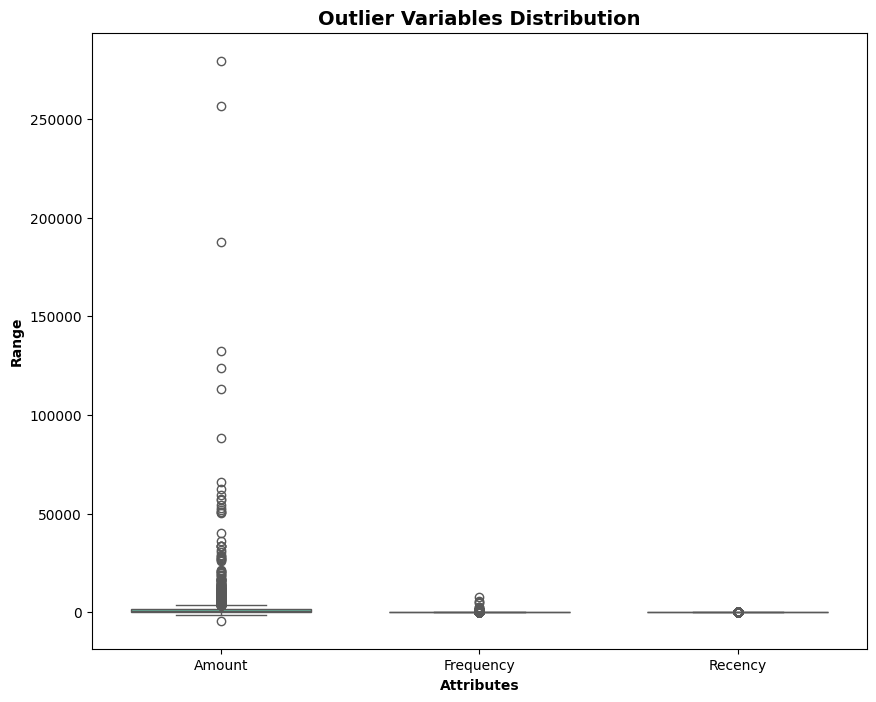

In [91]:
#outlier analysis of amount frequency and recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes],orient="v", palette="Set2", whis=1.5,saturation=1,width=0.7)
plt.title("Outlier Variables Distribution",fontsize = 14, fontweight='bold')
plt.ylabel("Range",fontweight = 'bold')
plt.xlabel("Attributes",fontweight='bold')

In [92]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm. Amount >= Q1 - 1.5*IQR) & (rfm. Amount <= Q3 + 1.5*IQR)]

#Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm [(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removina (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5+IQR) & (rfm.Frequency <= Q3 + 1.5+IQR)]

## Scaling the features

In [103]:
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(185, 3)

In [104]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,0.874029,-1.227671,0.195647
1,2.646483,0.281009,-0.605830
2,1.214525,-0.536193,-0.285239
3,0.342899,-0.083589,0.355942
4,0.628813,0.746185,-0.092885


### Model building

In [106]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,50
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [107]:
kmeans.labels_

array([2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1,
       2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 2, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 3, 1, 1,
       2, 2, 1, 2, 1, 1, 0, 2, 2], dtype=int32)

In [109]:
 set(kmeans.labels_)

{np.int32(0), np.int32(1), np.int32(2), np.int32(3)}

### Elbow Curve to get the right number of Clusters

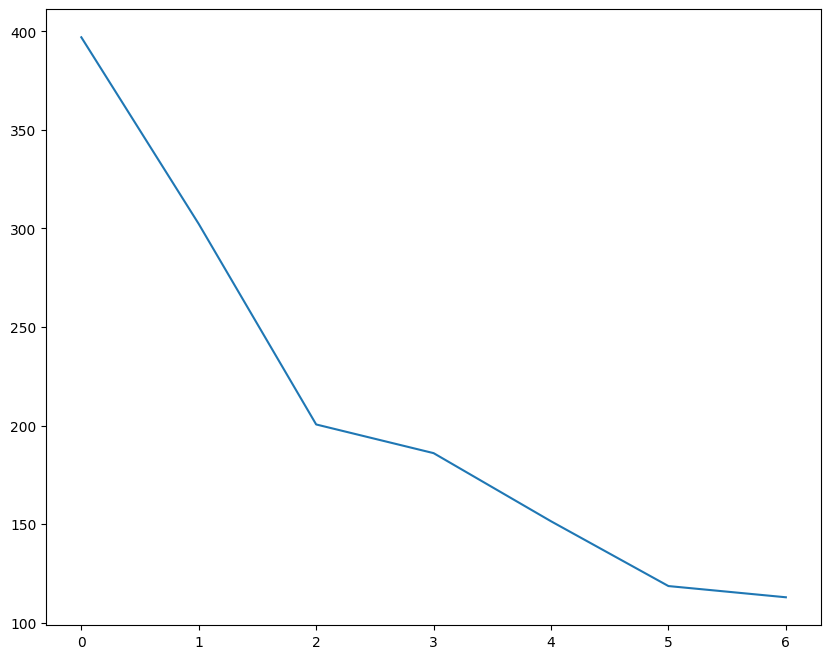

In [110]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [111]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,50
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [112]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
66,12428.0,7877.20,300,25,0
71,12433.0,13375.87,420,0,1
86,12451.0,8933.52,355,10,0
101,12472.0,6229.48,391,30,0
103,12474.0,7116.47,457,16,1


<Axes: xlabel='Cluster_Id', ylabel='Amount'>

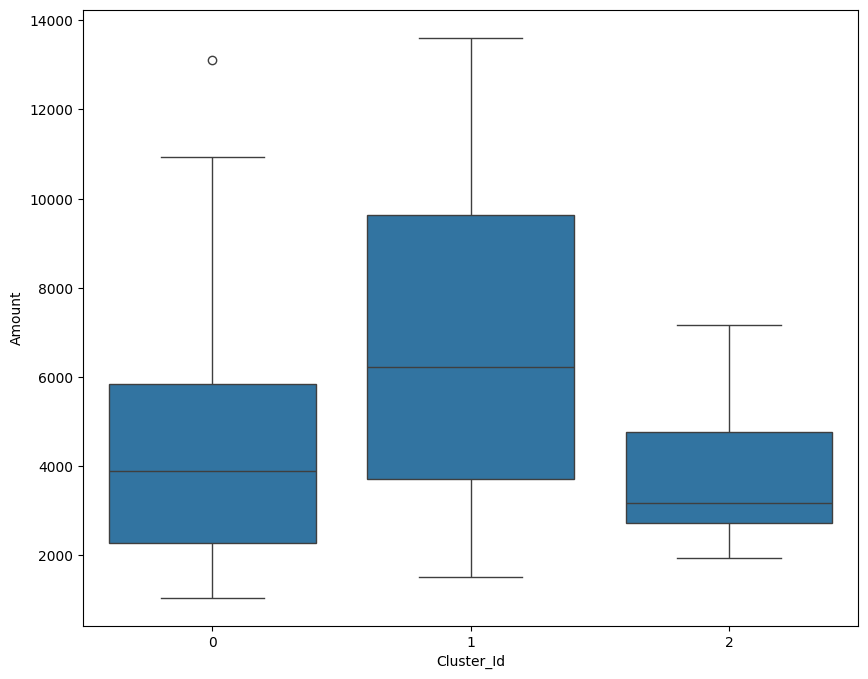

In [113]:
# Box plot to visualize Cluster Id vs Amount

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

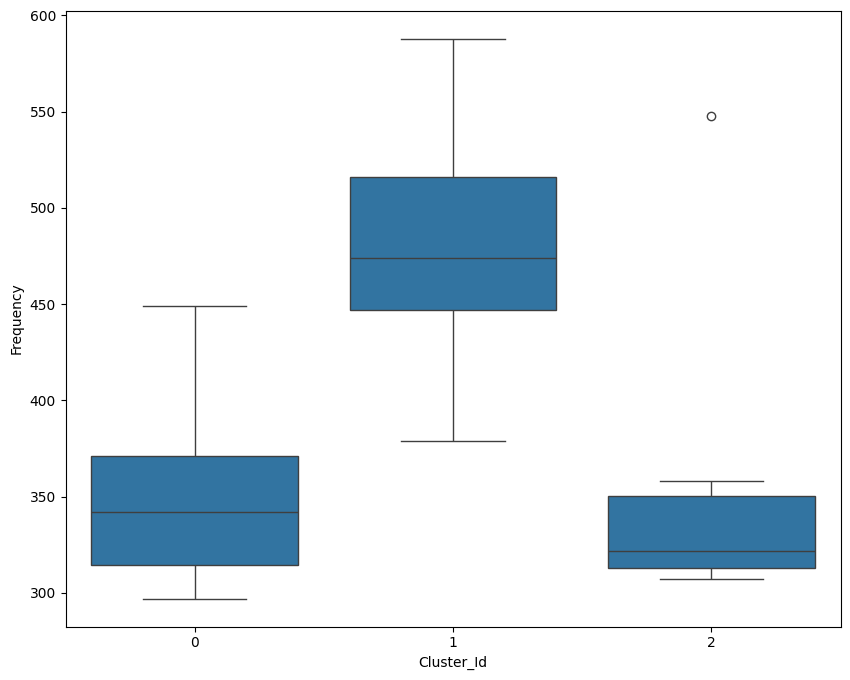

In [114]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)


In [ ]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

In [100]:
import pickle
# Define filename for pickle file
filename = 'kmeans_model.pkl'
# Open file in write mode
with open('Kmeans_saved_model', 'wb') as file:
    # Save the kmeans model to the file
    pickle.dump(kmeans, file)
# Close the file
file.close()
pickle.dump(kmeans, open('kmeans_model.pkl','wb'))

In [101]:
#assign the label
rfm['Cluster_Id']= kmeans.predict(rfm_df_scaled)
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
66,12428.0,7877.20,300,25,1
71,12433.0,13375.87,420,0,2
86,12451.0,8933.52,355,10,2
101,12472.0,6229.48,391,30,1
103,12474.0,7116.47,457,16,2


<Axes: xlabel='Cluster_Id', ylabel='Amount'>

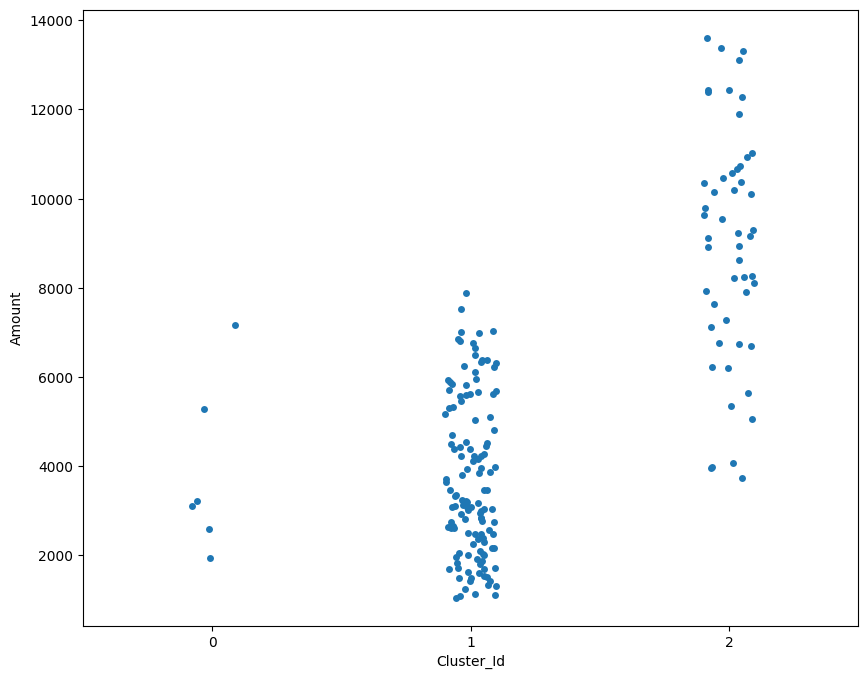

In [102]:
#Box plot to visualize cluster Id vs Amount
sns.stripplot(x='Cluster_Id', y='Amount', data=rfm)